In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import json
import os
import matplotlib.pyplot as plt
%cd /Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer

/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer


In [10]:
## loading clinical TCGA data

df_clinical = pd.read_csv("/Users/maayanlab/Downloads/clinical.cart.2018-06-28/clinical.csv").set_index('submitter_id')
clinical_ids = df_clinical.index.values.tolist()

In [12]:
# finding overlapping samples in clinical and expression data

# loading expression data to get list of overlapping samples
df_expression = pd.read_table("/Users/maayanlab/Documents/Ovarian Cancer Project/TCGA-OV-fpkm-uq.txt").set_index('gene_symbol')


# making list of patient (submitter) ids to use for the clinical analysis

sub_ids_exp = list(df_expression.columns.values)
sub_ids_corrected = []
for item in sub_ids_exp:
    new_item = item[0:12]
    sub_ids_corrected.append(new_item)

overlapping_ids = []
for item2 in sub_ids_corrected:
    if item2 in clinical_ids:
        overlapping_ids.append(item2)

In [111]:
# of these overlapping patients--find group of lowest survival/worst prognosis (dying within two years)

df_temp = pd.DataFrame()
df_temp["submitter_id"] = overlapping_ids
df_clinical_cut = df_clinical.merge(df_temp, left_on="submitter_id", right_on="submitter_id").set_index("submitter_id")
df_clinical_prognosis = pd.DataFrame()
list_days_to_death = df_clinical_cut["days_to_death"].tolist()
# list_days_to_death_int = []
# for item in list_days_to_death:
#     if item == "--":
#         list_days_to_death_int.append(item)
#     else:
#         item_int = int(item)
#         list_days_to_death_int.append(item_int)
# df_clinical_prognosis["days_to_death"] = list_days_to_death_int
df_clinical_prognosis["submitter_id"] = df_clinical_cut.index
df_clinical_prognosis["days_to_death"] = list_days_to_death
# df_clinical_prognosis = df_clinical_prognosis.set_index("submitter_id")

# df_clinical_prognosis = df_clinical_prognosis.sort_values(by="days_to_death", axis=0, ascending=True)

In [112]:
for number, rowdata in df_clinical_prognosis.iterrows():
    if rowdata["days_to_death"] == "--":
        df_clinical_prognosis = df_clinical_prognosis.drop(labels=number, axis=0)

In [115]:
days_to_death_updated = df_clinical_prognosis["days_to_death"].tolist()
days_to_death_updated_int = []
for item in days_to_death_updated:
    item_int = int(item)
    days_to_death_updated_int.append(item_int)
df_clinical_prognosis["days_to_death2"] = days_to_death_updated_int
df_clinical_prognosis = df_clinical_prognosis.sort_values(by="days_to_death2", axis=0)
# for number, rowdata in df_clinical_prognosis.iterrows():
#     if rowdata["days_to_death2"] > 730:
#         df_clinical_prognosis = df_clinical_prognosis.drop(labels=number, axis=0)
print(np.average(df_clinical_prognosis["days_to_death2"].tolist()))

1190.4761904761904


In [114]:
df_clinical_prognosis

,submitter_id,days_to_death,days_to_death2
280,TCGA-30-1857,8,8
181,TCGA-25-1631,9,9
349,TCGA-23-1107,9,9
326,TCGA-24-2262,11,11
72,TCGA-24-1422,23,23
265,TCGA-VG-A8LO,24,24
282,TCGA-24-2261,24,24
289,TCGA-24-2288,25,25
231,TCGA-25-2392,31,31
331,TCGA-25-1312,31,31


In [72]:
# saving to file
df_clinical_prognosis.to_csv("./rawdata/clinical_prognosis_worst.txt", sep="\t")

In [201]:
infiles = glob.glob('rawdata/combinationdrugs.dir/*_df_foranalysis.txt')

df_drugsmetadata = pd.read_csv("/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer/rawdata/Drugs_metadata.csv").set_index("pert_iname")

for infile in infiles:
    df_results = pd.read_table(infile)

    list_results_samples = list(df_results["sample"])
    list_results_samples_edited = []
    for item in list_results_samples:
        temp_item = item[0:12]
        list_results_samples_edited.append(temp_item)
    df_results["samples2"] = list_results_samples_edited

    # df_clinical_prognosis.read_table("/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer/rawdata/clinical_prognosis_worst.txt")

    df_results_merged = df_results.merge(df_clinical_prognosis, left_on="samples2", right_on="submitter_id")
    
    # to be able to use novel drug data and not have same drug listed under multiple brd ids


    # finding pert_name from pertids for predicted drugs using metadata file --will give name or pertid if no name available


#     list_pair_pertids = list(df_results.index)

#     list_pair_pertnames = []

    df_merge2 = df_results_merged.merge(df_drugsmetadata.reset_index(), on="pert_id")
    
    df_merge3 = df_merge2.groupby("pert_iname").size().rename("counts").to_frame().sort_values(by="counts", axis=0, ascending=False)


    
    drug_name = os.path.basename(infile).split('_')[0]
    
    outfile = './rawdata/combinationdrugs.dir/{drug_name}_worstprog_counts2.txt'.format(**locals())

    
    df_merge3.to_csv(outfile, sep="\t")





    

#     # # creating new dataframe of sorted counts of correct pertnames--can be used to make plots
#     # pair_correct_counts_keys = list(dict_pair_pertnames_counts.keys())
#     # pair_correct_counts_values = list(dict_pair_pertnames_counts.values())
#     # df_pair_correctpertnames = pd.DataFrame()
#     # df_pair_correctpertnames["pert_names"] = pair_correct_counts_keys
#     # df_pair_correctpertnames["counts"] = pair_correct_counts_values
#     # df_pair_correctpertnames = df_pair_correctpertnames.sort_values(by="counts", axis=0, ascending=False)



#     # # save to file
#     # df_pair_correctpertnames.to_csv(outfile, sep="\t", index = False)

#     # # open file
#     # f = open(outfile, 'w')

#     # # write to file
#     # f.write(json.dumps(dict_pair_pertnames_counts, ensure_ascii=False, indent=4))

#     # # close file
#     # f.close()


In [199]:
df_results.head()

AttributeError: 'function' object has no attribute 'head'

In [120]:
number_patients_alive = [] # then divide by number of patients with data about survival
x = 0
list_days = []
while x <= 4700:
    count = 0
    list_days.append(x)
    for sample, rowdata in df_clinical_prognosis.iterrows():
        if rowdata["days_to_death2"] > x:
            count += 1
    number_patients_alive.append(count)
    x = x + 100
        
    
    

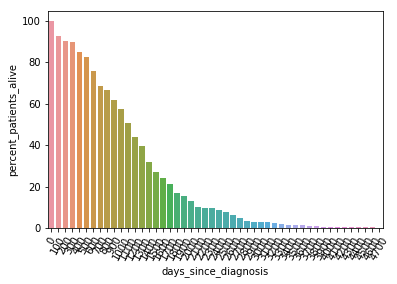

In [134]:
df_survival_forplot = pd.DataFrame()
df_survival_forplot["days_since_diagnosis"] = list_days
df_survival_forplot["number_of_patients_alive"] = number_patients_alive
percent_patients_alive = []
for item in number_patients_alive:
    percent_patients_alive.append((item/231)*100)
df_survival_forplot["percent_patients_alive"] = percent_patients_alive
fig = sns.barplot(x="days_since_diagnosis", y="percent_patients_alive", data=df_survival_forplot)
plt.xticks(rotation=60)
# fig.set(xlabel="")
plt.show()

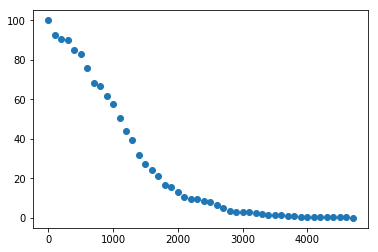

In [131]:
fig = plt.scatter(x=df_survival_forplot["days_since_diagnosis"], y=df_survival_forplot["percent_patients_alive"])

In [136]:
df_survival_forplot.to_csv("./rawdata/percentsurvival_forplot.txt", sep="\t")

In [153]:
infile4 = "./rawdata/TCGA-OV-fpkm-uq_L1000_drugsig_sigids_merged.txt"
df_alone = pd.read_table(infile4).set_index("sig_id")

In [146]:
for direction, rowdata in df_alone.iterrows():
    if direction == "opposite":
        df_alone = df_alone.drop(labels=direction, axis=0)

KeyError: "['opposite'] not found in axis"

In [154]:
df_alone2 = df_alone[df_alone["direction"]=="similar"].copy(deep=True)
## 1--getting just reversing alone drugs (similar)

In [159]:
## 2--getting just worst prognosis patient alone drugs
list_alone_samples = df_alone2["sample"].tolist()
list_alone_samples_edited = []
for item in list_alone_samples:
    temp_item = item[0:12]
    list_alone_samples_edited.append(temp_item)
df_alone2["samples2"] = list_alone_samples_edited

df_alone2_clinical = df_alone2.merge(df_clinical_prognosis, left_on="samples2", right_on="submitter_id")

In [176]:
## 3--# to be able to use novel drug data and not have same drug listed under multiple brd ids


    # finding pert_name from pertids for predicted drugs using metadata file --will give name or pertid if no name available


list_pair_pertids2 = list(df_alone2_clinical["pert_id"])

list_pair_pertnames2 = []


for name, rowdata in df_drugsmetadata.iterrows():
    temp_pertid = rowdata["pert_id"]
    if temp_pertid in list_pair_pertids2:
        list_pair_pertnames2.append(name)

df_alone3 = pd.DataFrame()

df_alone3["pert_name"] = list_pair_pertnames2
    
df_alone4 = df_alone3.groupby('pert_name').size().rename('counts').to_frame()
df_alone4 = df_alone4.sort_values(by="counts", axis=0, ascending=False)
    
outfile4 = './rawdata/alone_worst_prog_counts.txt'

    
df_alone4.to_csv(outfile4, sep="\t")

In [178]:
df_drugsmetadata.head()

,pert_id,LSM_id,alt_name,canonical_smiles,inchi_key,inchi_string,molecular_formula,molecular_wt,pert_collection,pert_summary,pert_url,pubchem_cid
pert_iname,,,,,,,,,,,,
nifurtimox,BRD-A00100033,LSM-1232,NaN,CC1CS(=O)(=O)CCN1N=Cc2ccc(o2)[N+](=O)[O-],InChIKey=ARFHIAQFJWUCFH-UHFFFAOYSA-N,"InChI=1S/C10H13N3O5S/c1-8-7-19(16,17)5-4-12(8)...",C10H13N3O5S,287.292,BIOA,NaN,http://en.wikipedia.org/wiki/Nifurtimox,6842999
otenzepad,BRD-A00520476,LSM-22625,AF-DX 116,CCN(CC)CC1CCCCN1CC(=O)N2c3ccccc3C(=O)Nc4cccnc24,InChIKey=UBRKDAVQCKZSPO-UHFFFAOYSA-N,InChI=1S/C24H31N5O2/c1-3-27(4-2)16-18-10-7-8-1...,C24H31N5O2,421.535,BIOA,NaN,http://www.tocris.com/dispprod.php?ItemId=2135...,107867
biperiden,BRD-A00546892,LSM-1235,S1285,OC(CCN1CCCCC1)(C2CC3CC2C=C3)c4ccccc4,InChIKey=YSXKPIUOCJLQIE-UHFFFAOYSA-N,"InChI=1S/C21H29NO/c23-21(19-7-3-1-4-8-19,11-14...",C21H29NO,311.461,BIOA,Biperiden is an antiparkinsonian agent of the ...,"http://en.wikipedia.org/wiki/Biperiden,http://...",92151
noretynodrel,BRD-A00758722,LSM-1237,norethynodrel,C[C@@]12CCC3C(CCC4=C3CCC(=O)C4)C2CC[C@@]1(O)C#C,InChIKey=ICTXHFFSOAJUMG-OQPPHWFISA-N,InChI=1S/C20H26O2/c1-3-20(22)11-9-18-17-6-4-13...,C20H26O2,298.419,BIOA,NaN,"http://en.wikipedia.org/wiki/Norethynodrel,htt...",5702095
dyphylline,BRD-A00827783,LSM-4299,diprophylline,Cn1c(=O)n(C)c2ncn(CC(O)CO)c2c1=O,InChIKey=KSCFJBIXMNOVSH-UHFFFAOYSA-N,InChI=1S/C10H14N4O4/c1-12-8-7(9(17)13(2)10(12)...,C10H14N4O4,254.243,BIOA,NaN,http://en.wikipedia.org/wiki/Dyphylline,3182


In [179]:
df_alone2_clinical.head()

,Unnamed: 0,combined_scores,pvals,qvals,scores,zscores,direction,sample,Unnamed: 0.1,batch,...,pert_desc,pert_dose,pert_id,pert_time,pvalue,up_genes,samples2,submitter_id,days_to_death,days_to_death2
0,0,7.295379,0.000029,1.0,0.052154,-1.609650,similar,TCGA-04-1331-01,CPC006_A375_24H:BRD-A31107743-001-01-3:0.09,CPC006_A375_24H,...,89671,0.09,BRD-A31107743,24,0.0,"['DHDDS', 'TIMP3', 'FKBP11', 'STK10', 'MLEC', ...",TCGA-04-1331,TCGA-04-1331,1336,1336
1,34,6.234259,0.000120,1.0,0.049887,-1.589577,similar,TCGA-04-1331-01,CPC004_HCC515_24H:BRD-K39120595-304-03-9:10,CPC004_HCC515_24H,...,BITHIONATE SODIUM,10.00,BRD-K39120595,24,0.0,"['DHDDS', 'NME7', 'IFT20', 'PPAP2B', 'FKBP11',...",TCGA-04-1331,TCGA-04-1331,1336,1336
2,50,5.905884,0.000199,1.0,0.047619,-1.596047,similar,TCGA-04-1331-01,CPC005_A375_24H:BRD-K69023402-001-02-5:10,CPC005_A375_24H,...,THAPSIGARGIN,10.00,BRD-K69023402,24,0.0,"['PCK2', 'DHDDS', 'PMAIP1', 'CPM', 'HSPA5', 'F...",TCGA-04-1331,TCGA-04-1331,1336,1336
3,72,5.199778,0.000522,1.0,0.045351,-1.584179,similar,TCGA-04-1331-01,CPC003_HA1E_24H:BRD-K38477985-001-01-8:10,CPC003_HA1E_24H,...,Malonoben,10.00,BRD-K38477985,24,0.0,"['PCK2', 'DHDDS', 'IFT27', 'IFT20', 'WWOX', 'F...",TCGA-04-1331,TCGA-04-1331,1336,1336
4,95,4.889657,0.000898,1.0,0.043084,-1.604766,similar,TCGA-04-1331-01,CPC003_HA1E_24H:BRD-K10207760-236-03-0:10,CPC003_HA1E_24H,...,Lasalocid sodium salt,10.00,BRD-K10207760,24,0.0,"['DHDDS', 'TIMP3', 'COL11A1', 'FKBP11', 'IDI1'...",TCGA-04-1331,TCGA-04-1331,1336,1336


In [185]:
df_merge = df_alone2_clinical.merge(df_drugsmetadata.reset_index(), on="pert_id")
print(df_merge.shape)
df_merge.head()

(11750, 37)


,Unnamed: 0,combined_scores,pvals,qvals,scores,zscores,direction,sample,Unnamed: 0.1,batch,...,alt_name,canonical_smiles,inchi_key,inchi_string,molecular_formula,molecular_wt,pert_collection,pert_summary,pert_url,pubchem_cid
0,0,7.295379,0.000029,1.0,0.052154,-1.609650,similar,TCGA-04-1331-01,CPC006_A375_24H:BRD-A31107743-001-01-3:0.09,CPC006_A375_24H,...,S7046,CC1CCCC=C/C2CC(O)CC2C(O)C=C/C(=O)O1,InChIKey=KQNZDYYTLMIZCT-MOIRPGTBSA-N,InChI=1S/C16H24O4/c1-11-5-3-2-4-6-12-9-13(17)1...,C16H24O4,280.359,BIOA,Brefeldin A is a lactone antibiotic and ATPase...,"http://en.wikipedia.org/wiki/Brefeldin_A,http:...",5353446
1,303,3.534340,0.006521,1.0,0.038549,-1.617052,similar,TCGA-04-1331-01,CPC006_A549_24H:BRD-A31107743-001-01-3:0.09,CPC006_A549_24H,...,S7046,CC1CCCC=C/C2CC(O)CC2C(O)C=C/C(=O)O1,InChIKey=KQNZDYYTLMIZCT-MOIRPGTBSA-N,InChI=1S/C16H24O4/c1-11-5-3-2-4-6-12-9-13(17)1...,C16H24O4,280.359,BIOA,Brefeldin A is a lactone antibiotic and ATPase...,"http://en.wikipedia.org/wiki/Brefeldin_A,http:...",5353446
2,369,3.095482,0.012996,1.0,0.036281,-1.641135,similar,TCGA-04-1331-01,CPC006_VCAP_24H:BRD-A31107743-001-01-3:0.09,CPC006_VCAP_24H,...,S7046,CC1CCCC=C/C2CC(O)CC2C(O)C=C/C(=O)O1,InChIKey=KQNZDYYTLMIZCT-MOIRPGTBSA-N,InChI=1S/C16H24O4/c1-11-5-3-2-4-6-12-9-13(17)1...,C16H24O4,280.359,BIOA,Brefeldin A is a lactone antibiotic and ATPase...,"http://en.wikipedia.org/wiki/Brefeldin_A,http:...",5353446
3,666,2.929887,0.017086,1.0,0.034014,-1.657783,similar,TCGA-04-1331-01,CPC006_HA1E_6H:BRD-A31107743-001-01-3:0.09,CPC006_HA1E_6H,...,S7046,CC1CCCC=C/C2CC(O)CC2C(O)C=C/C(=O)O1,InChIKey=KQNZDYYTLMIZCT-MOIRPGTBSA-N,InChI=1S/C16H24O4/c1-11-5-3-2-4-6-12-9-13(17)1...,C16H24O4,280.359,BIOA,Brefeldin A is a lactone antibiotic and ATPase...,"http://en.wikipedia.org/wiki/Brefeldin_A,http:...",5353446
4,702,2.132064,0.049053,1.0,0.031746,-1.628359,similar,TCGA-04-1331-01,CPC006_NCIH2073_6H:BRD-A31107743-001-01-3:0.09,CPC006_NCIH2073_6H,...,S7046,CC1CCCC=C/C2CC(O)CC2C(O)C=C/C(=O)O1,InChIKey=KQNZDYYTLMIZCT-MOIRPGTBSA-N,InChI=1S/C16H24O4/c1-11-5-3-2-4-6-12-9-13(17)1...,C16H24O4,280.359,BIOA,Brefeldin A is a lactone antibiotic and ATPase...,"http://en.wikipedia.org/wiki/Brefeldin_A,http:...",5353446


In [181]:
df_alone2_clinical.shape

(11750, 25)

In [203]:
df_merge_grouped = df_merge.groupby("pert_iname").size().rename("counts").to_frame().sort_values(by="counts", axis=0, ascending=False)
df_merge_grouped.to_csv("./rawdata/corrected_alone_drugs2.txt", sep="\t")

In [184]:
df_merge.columns

Index(['Unnamed: 0', 'combined_scores', 'pvals', 'qvals', 'scores', 'zscores',
       'direction', 'sample', 'Unnamed: 0.1', 'batch', 'cell_id',
       'combined_genes', 'distil_id', 'down_genes',
       'mean_cosine_dist_centered_by_batch', 'pert_desc', 'pert_dose',
       'pert_id', 'pert_time', 'pvalue', 'up_genes', 'samples2',
       'submitter_id', 'days_to_death', 'days_to_death2', 'LSM_id', 'alt_name',
       'canonical_smiles', 'inchi_key', 'inchi_string', 'molecular_formula',
       'molecular_wt', 'pert_collection', 'pert_summary', 'pert_url',
       'pubchem_cid'],
      dtype='object')

In [177]:
df_alone4.sort_values(by="counts", axis=0, ascending=False)

,counts
pert_name,
hydrocortisone,6
testosterone,5
cyclosporin-a,4
dexamethasone,4
triciribine,3
indirubin,3
ouabain,3
parthenolide,3
daunorubicin,3


In [166]:
df_alone2_clinical2 = df_alone2_clinical.groupby("pert_desc").size().rename("counts").to_frame()

In [172]:
df_alone2_clinical2.sort_values(by="counts", axis=0, ascending=False)

,counts
pert_desc,
-666,4371
89671,141
Tyrphostin AG 1478,54
Brefeldin A,49
Rottlerin,47
CAY10594,45
PD0332991,44
BNTX maleate,43
DG-041,42


In [207]:
# getting 75 patients with best prognosis
df_clinical_prognosis_top75 = df_clinical_prognosis[-75:]

In [210]:
# finding counts for patients with best prognosis
infiles = glob.glob('rawdata/combinationdrugs.dir/*_df_foranalysis.txt')

df_drugsmetadata = pd.read_csv("/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer/rawdata/Drugs_metadata.csv").set_index("pert_iname")

for infile in infiles:
    df_results = pd.read_table(infile)

    list_results_samples = list(df_results["sample"])
    list_results_samples_edited = []
    for item in list_results_samples:
        temp_item = item[0:12]
        list_results_samples_edited.append(temp_item)
    df_results["samples2"] = list_results_samples_edited

    # df_clinical_prognosis.read_table("/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer/rawdata/clinical_prognosis_worst.txt")

    df_results_merged = df_results.merge(df_clinical_prognosis_top75, left_on="samples2", right_on="submitter_id")
    
    # to be able to use novel drug data and not have same drug listed under multiple brd ids


    # finding pert_name from pertids for predicted drugs using metadata file --will give name or pertid if no name available


#     list_pair_pertids = list(df_results.index)

#     list_pair_pertnames = []

    df_merge3 = df_results_merged.merge(df_drugsmetadata.reset_index(), on="pert_id")
    
    df_merge4 = df_merge2.groupby("pert_iname").size().rename("counts").to_frame().sort_values(by="counts", axis=0, ascending=False)


    
    drug_name = os.path.basename(infile).split('_')[0]
    
    outfile = './rawdata/combinationdrugs.dir/{drug_name}_bestprog_count.txt'.format(**locals())

    
    df_merge4.to_csv(outfile, sep="\t")



In [237]:
## subtracting top drugs for best prognosis patients from drugs suggested for patients with worst prognosis

infile_worst_cisplatin = 'rawdata/combinationdrugs.dir/cisplatin_worstprog_counts2.txt'
infile_best_cisplatin = 'rawdata/combinationdrugs.dir/cisplatin_bestprog_count.txt'
infile_worst_paclitaxel = 'rawdata/combinationdrugs.dir/paclitaxel_worstprog_counts2.txt'
infile_best_paclitaxel = 'rawdata/combinationdrugs.dir/paclitaxel_bestprog_count.txt'


df_cis_best = pd.read_table(infile_best_cisplatin)
df_cis_worst = pd.read_table(infile_worst_cisplatin)
df_cis_merged = df_cis_worst.merge(df_cis_best, left_on="Suggested Drug Name", right_on="pert_iname")
df_cis_merged["new_counts"] = df_cis_merged["Number of Times Suggested"] - df_cis_merged["counts"]
df_cis_merged = df_cis_merged.set_index("Suggested Drug Name")
df_cis_merged_counts = df_cis_merged.sort_values(by="new_counts", axis=0, ascending=False)
df_cis_merged_counts.to_csv("./rawdata/combinationdrugs.dir/subtractedbest_cisresults.txt", sep="\t")

df_pac_best = pd.read_table(infile_best_paclitaxel)
df_pac_worst = pd.read_table(infile_worst_paclitaxel)
df_pac_merged = df_pac_worst.merge(df_pac_best, left_on="Suggested Drug Name", right_on="pert_iname")
df_pac_merged["new_counts"] = df_pac_merged["Number of Times Suggested"] - df_pac_merged["counts"]
df_pac_merged = df_pac_merged.set_index("Suggested Drug Name")
df_pac_merged_counts = df_pac_merged.sort_values(by="new_counts", axis=0, ascending=False)
df_pac_merged_counts.to_csv("./rawdata/combinationdrugs.dir/subtractedbest_pacresults.txt", sep="\t")

In [234]:
df_cis_merged.sort_values(by="new_counts", axis=0, ascending=False)

,Number of Times Suggested,pert_iname,counts,new_counts
Suggested Drug Name,,,,
brefeldin-a,572,brefeldin-a,512,60
thapsigargin,203,thapsigargin,146,57
THM-I-94,61,THM-I-94,13,48
trichostatin-a,78,trichostatin-a,32,46
ISOX,62,ISOX,17,45
palbociclib,43,palbociclib,2,41
wortmannin,48,wortmannin,12,36
daunorubicin,38,daunorubicin,5,33
belinostat,46,belinostat,16,30
